In [2]:
# Import libraries
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
datasets = load_dataset('lukebarousse/data_jobs')
df = datasets['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


c:\Users\USER\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df.loc[:,'salary_rate':'salary_hour_avg'].dropna(subset='salary_rate')

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,NaN
43,hour,NaN,97.5
51,hour,NaN,72.5
77,year,140000.0,NaN
92,year,120000.0,NaN
...,...,...,...
785624,year,139216.0,NaN
785641,year,150000.0,NaN
785648,year,221875.0,NaN
785682,year,157500.0,NaN


In [5]:
median_salary_year = df['salary_year_avg'].median()
median_salary_hour = df['salary_hour_avg'].median()

In [6]:
df_filled = df
df_filled['salary_year_avg']=df_filled['salary_year_avg'].fillna(median_salary_year)
df_filled['salary_hour_avg']=df_filled['salary_hour_avg'].fillna(median_salary_hour)

In [7]:
df_filled.loc[:10,'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


In [8]:
df_unique = df_filled

df_unique = df_unique.drop_duplicates()

print('Length of original df:          ', len(df_filled))
print('Length of drop duplicates df:   ', len(df_unique))
print('Rows Dropped:               :   ',len(df_filled)-len(df_unique))

Length of original df:           785741
Length of drop duplicates df:    785640
Rows Dropped:               :    101


In [9]:
df_unique = df_unique.drop_duplicates(subset=['job_title', 'company_name'])

print('Length of original df:          ', len(df_filled))
print('Length of drop duplicates df:   ', len(df_unique))
print('Rows Dropped:               :   ',len(df_filled)-len(df_unique))



Length of original df:           785741
Length of drop duplicates df:    508042
Rows Dropped:               :    277699


#Data Management


In [10]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,115000.0,45.98,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,115000.0,45.98,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,115000.0,45.98,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,115000.0,45.98,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [11]:
df.sample(5,random_state = 42)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
502901,Senior Data Engineer,Senior Data Engineer,"St Paul, MN",via BeBee,Full-time,False,"Florida, United States",2023-12-17 11:09:06,False,False,United States,None,115000.0,45.98,ManpowerGroup,"['sql', 'azure', 'git']","{'cloud': ['azure'], 'other': ['git'], 'progra..."
406337,Senior Data Scientist,Senior Analytics Engineer,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-10-06 16:09:56,False,False,United Kingdom,None,115000.0,45.98,Harnham,"['sql', 'python', 'bigquery', 'snowflake', 'lo...","{'analyst_tools': ['looker'], 'cloud': ['bigqu..."
659951,Data Engineer,Data Engineer,"Newcastle upon Tyne, UK",via Indeed,Full-time,False,United Kingdom,2023-09-06 10:11:25,True,False,United Kingdom,None,115000.0,45.98,Morgan King,None,None
541593,Data Analyst,Data Analyst,Malta,via Trabajo.org,Full-time,False,Malta,2023-02-14 21:14:18,True,False,Malta,None,115000.0,45.98,Konnekt,['jira'],{'async': ['jira']}
425158,Senior Data Engineer,Senior Data Engineer. Job in Amsterdam NBC4i Jobs,"Amsterdam, Netherlands",via NBC4i Jobs,Full-time,False,Netherlands,2023-06-19 16:34:30,True,False,Netherlands,None,115000.0,45.98,Independent Recruiters,['python'],{'programming': ['python']}


DF.COPY()

In [12]:
df_original = datasets['train'].to_pandas()

In [13]:
df_altered = df_original.copy()


In [14]:
print('ID of df_original:                            ', id(df_original))
print('ID of df_altered:                             ', id(df_altered))
print('Are the two dataframes the same?:             ', id(df_altered)==id(df_original))



ID of df_original:                             2581032096464
ID of df_altered:                              2581007087648
Are the two dataframes the same?:              False


In [15]:
median_salary = df_altered['salary_year_avg'].median()
df_altered['salary_year_avg']=df_altered['salary_year_avg'].fillna(median_salary)
df_altered.loc[:5,'salary_year_avg']


0    115000.0
1    115000.0
2    115000.0
3    115000.0
4    115000.0
5    115000.0
Name: salary_year_avg, dtype: float64

In [16]:
df_original.loc[:5,'salary_year_avg']

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: salary_year_avg, dtype: float64

# Pivot Tables

In [17]:
df.pivot_table(values='salary_year_avg',index='job_country',columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,115000.0,NaN,115000.0,NaN,115000.0,NaN,115000.0,NaN,NaN,NaN
Albania,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Algeria,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,NaN,115000.0
Angola,115000.0,NaN,115000.0,115000.0,115000.0,NaN,NaN,NaN,115000.0,115000.0
Argentina,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Vietnam,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Yemen,115000.0,NaN,115000.0,115000.0,NaN,NaN,NaN,NaN,NaN,115000.0


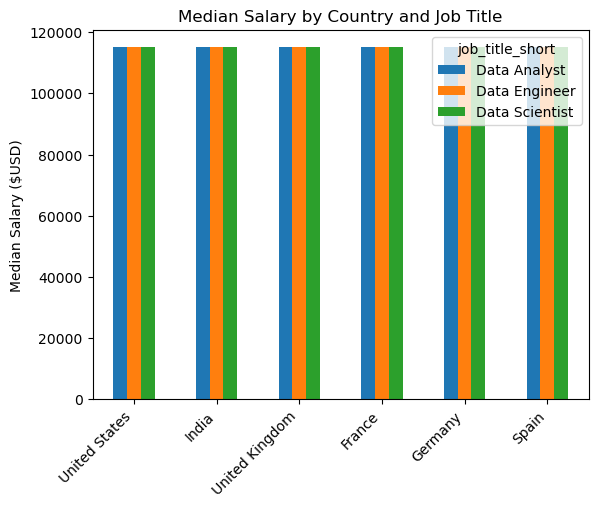

In [18]:
top_countries = df['job_country'].value_counts().head(6).index



df_job_country_salary = df.pivot_table(
  values = 'salary_year_avg',
  index='job_country',
  columns='job_title_short',
  aggfunc='median'

)

df_job_country_salary = df_job_country_salary.loc[top_countries]
job_title = ['Data Analyst','Data Engineer','Data Scientist']

df_job_country_salary = df_job_country_salary[job_title]

df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45,ha='right')
plt.show()


Three Methods to cover: df.reset_index(); df.set_index(); df.sort_index()

In [19]:
df_usa =df[df['job_country']=='United States']


In [20]:
df_usa.reset_index(inplace=True)
df_usa.head(5)

,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None
1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,115000.0,45.98,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,115000.0,45.98,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,115000.0,45.98,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,115000.0,45.98,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [21]:
#sort_index()

median_pivot = df_usa.pivot_table(values='salary_year_avg',index='job_title_short',aggfunc=['median','min','max'])

In [22]:
median_pivot

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,115000.0,35000.0,387460.0
Cloud Engineer,115000.0,42000.0,221844.0
Data Analyst,115000.0,25000.0,375000.0
Data Engineer,115000.0,23496.0,525000.0
Data Scientist,115000.0,30000.0,960000.0
Machine Learning Engineer,115000.0,44408.5,315000.0
Senior Data Analyst,115000.0,35360.0,425000.0
Senior Data Engineer,115000.0,45000.0,375000.0


In [23]:
median_pivot.sort_values(by=('median','salary_year_avg'), ascending=False)

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,115000.0,35000.0,387460.0
Cloud Engineer,115000.0,42000.0,221844.0
Data Analyst,115000.0,25000.0,375000.0
Data Engineer,115000.0,23496.0,525000.0
Data Scientist,115000.0,30000.0,960000.0
Machine Learning Engineer,115000.0,44408.5,315000.0
Senior Data Analyst,115000.0,35360.0,425000.0
Senior Data Engineer,115000.0,45000.0,375000.0


In [24]:
median_pivot.sort_index(inplace=True)

In [25]:
median_pivot

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,115000.0,35000.0,387460.0
Cloud Engineer,115000.0,42000.0,221844.0
Data Analyst,115000.0,25000.0,375000.0
Data Engineer,115000.0,23496.0,525000.0
Data Scientist,115000.0,30000.0,960000.0
Machine Learning Engineer,115000.0,44408.5,315000.0
Senior Data Analyst,115000.0,35360.0,425000.0
Senior Data Engineer,115000.0,45000.0,375000.0


Exercise: Monthly Job Demand

In [26]:
df_US=df[df['job_country']=='United States'].copy()

In [27]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,115000.0,45.98,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July


In [28]:
df_US_pivot=df_US.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

#Creating a numeric month column

In [29]:
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no']=pd.to_datetime(df_US_pivot['job_posted_month'],format='%B').dt.month
df_US_pivot.sort_values('month_no',inplace = True)
df_US_pivot.set_index('job_posted_month',inplace=True)
df_US_pivot.drop(columns='month_no',inplace=True)


In [30]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [31]:
#df_US_pivot.plot()

top_5 =df_US['job_title_short'].value_counts().head(5)
top_5 =top_5.index.tolist()


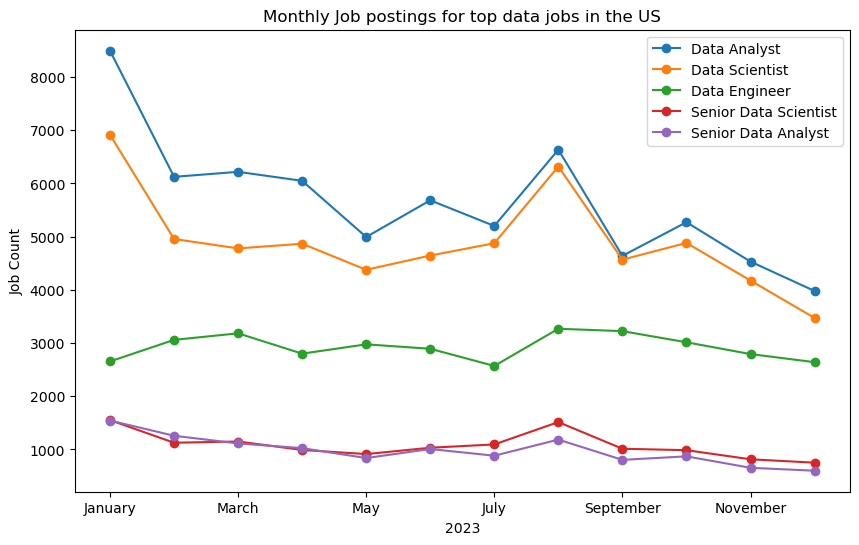

In [32]:
df_US_pivot[top_5].plot(kind='line', figsize=(10,6), marker='o')
plt.title('Monthly Job postings for top data jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()
           

# Read_CSV

In [33]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [34]:
df_US_merged=df_US_pivot.merge(right = df_US_software_pivot,how='inner',on='job_posted_month')

In [35]:
top_5 = (
    df_US_merged
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .to_list()
    )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

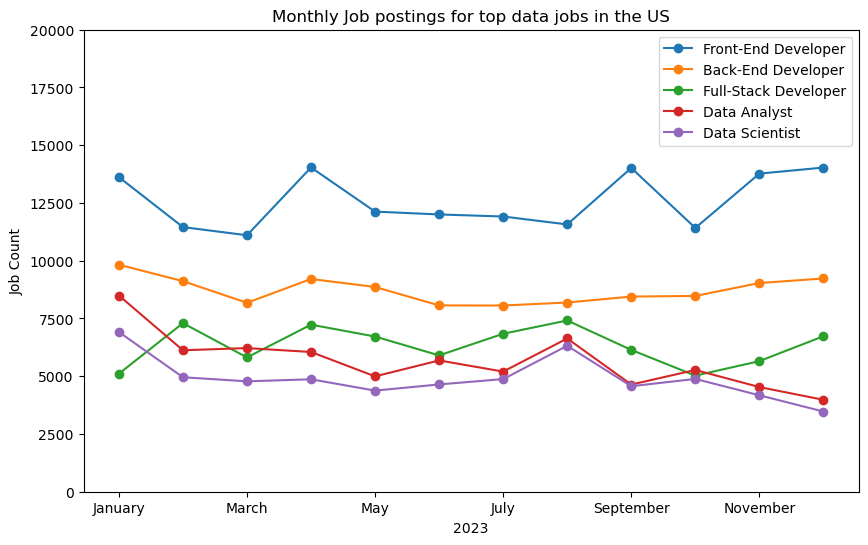

In [36]:
df_US_merged[top_5].plot(kind='line', figsize=(10,6), marker='o')
plt.title('Monthly Job postings for top data jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0,20000)
plt.legend()
plt.show()

COncat dataframes

In [37]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [38]:
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

FUnctions

In [39]:
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

In [40]:
df_salary = df[pd.notna(df['salary_year_avg'])].copy()

def projected_salary(salary):
    return salary * 1.03

df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(projected_salary)

df_salary[['salary_year_avg','salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [41]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(lambda salary: salary * 1.03)

df_salary[['salary_year_avg','salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [42]:
import ast


In [43]:
def clean_list(skill_list):
    if pd.notna(skill_list):
     return ast.literal_eval(skill_list)    
    
df['job_skills']=df['job_skills'].apply(clean_list)

In [44]:
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else  skill_list)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
type(df['job_skills'][2])

list

Calculate projected salary next year

1. Senior roles assume 5%
2. Other roles assume 3%

In [ ]:
df_salary['salary_year_inflated'] = df_salary.apply(lambda salary: 1.05 * salary['salary_year_avg'] if "Senior" in salary['job_title_short'] else  1.03 * salary['salary_year_avg'],axis=1)

df_salary[['job_title_short','salary_year_avg','salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


In [ ]:
def projected_salary(row):
    if "Senior" in row['job_title_short']:
      return 1.05 * row['salary_year_avg']
    
    else:
       return 1.03 * row['salary_year_avg']
                      

df_salary['salary_year_inflated'] = df_salary.apply(projected_salary, axis=1)

df_salary[['job_title_short','salary_year_avg','salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


df.Explode() method

In [ ]:
#df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else  skill_list)
df_exploded = df.explode('job_skills',ignore_index=True)
type(df['job_skills'][2])

list

In [ ]:
df_exploded[['job_title_short','job_skills']].explode('job_skills')

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,r
2,Data Analyst,python
3,Data Analyst,sql
4,Data Analyst,nosql
...,...,...
3777315,Data Engineer,kafka
3777316,Data Engineer,kubernetes
3777317,Data Engineer,docker
3777318,Software Engineer,aws


<Axes: xlabel='job_skills'>

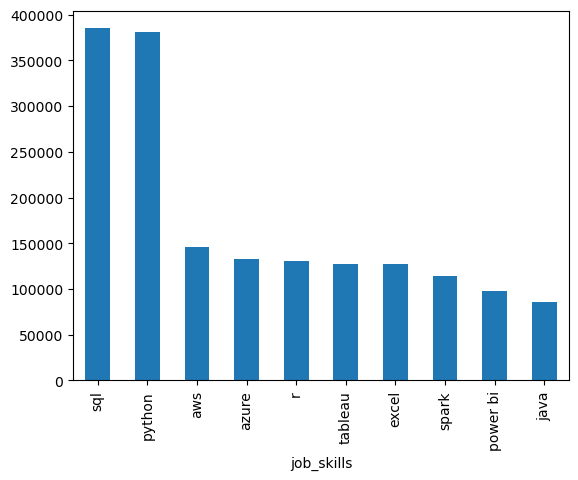

In [ ]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [ ]:
skills_count =df_exploded.groupby(['job_title_short','job_skills']).size()
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [ ]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count',ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


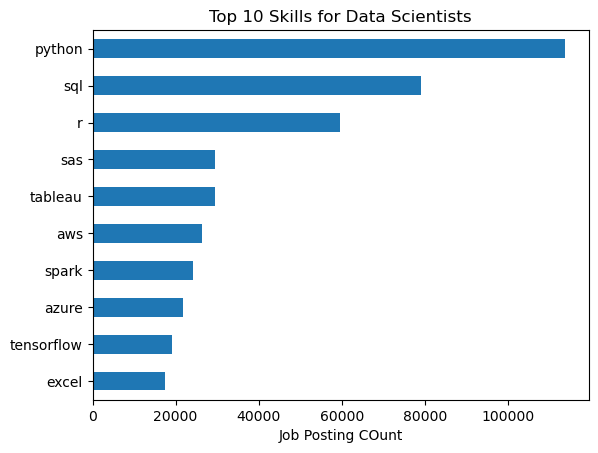

In [ ]:
job_title = 'Data Scientist'
top_skills = 10


df_skill_final = df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)

df_skill_final.plot(kind='barh',x='job_skills',y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting COunt')
plt.ylabel('')
plt.legend().set_visible(False)
           
           



Exercise: Trending SKills

In [53]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

In [ ]:
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month

df_DA.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12


In [ ]:

df_DA_exploded= df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot.loc['Total'].sort_values(ascending=False).index

Index(['sql', 'excel', 'python', 'tableau', 'power bi', 'r', 'sas',
       'powerpoint', 'word', 'sap',
       ...
       'xamarin', 'mattermost', 'gtx', 'esquisse', 'chainer', 'capacitor',
       'nuxt.js', 'msaccess', 'ovh', 'suse'],
      dtype='object', name='job_skills', length=235)

In [ ]:
df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


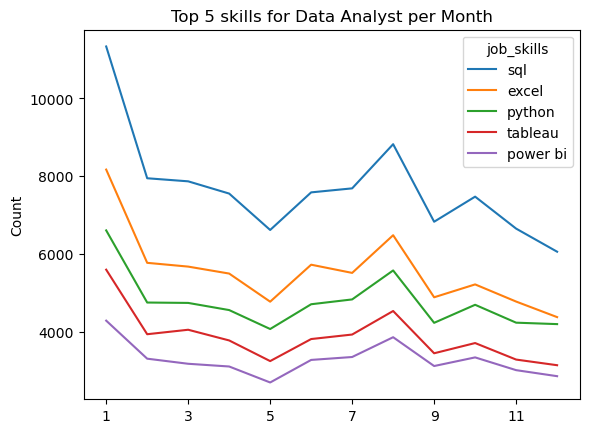

In [ ]:
df_DA_pivot.iloc[:,:5].plot(kind='line')
plt.title('Top 5 skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel('') 
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6268\2957407570.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert =False)


{'whiskers': [<matplotlib.lines.Line2D at 0x1436f5aa6b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1436f5c6d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1436f5aa350>,
 'medians': [<matplotlib.lines.Line2D at 0x1436f5c7340>,
 'fliers': [<matplotlib.lines.Line2D at 0x1436f5993f0>,
 'means': []}

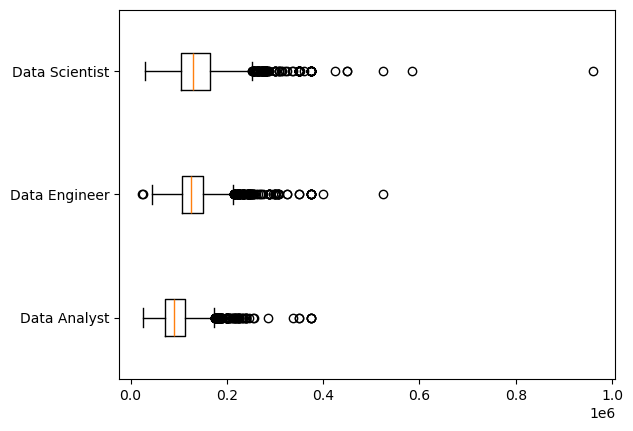

In [ ]:
job_titles =['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] =='United States')].copy()

df_US=df_US.dropna(subset='salary_year_avg')


job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert =False)



In [ ]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

In [ ]:
df_US['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64

PYTHON Projects


In [54]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for US Data Analyst roles

In [55]:
df_DA_US =df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]
df_DA_US.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"


In [57]:
df_DA_US['job_location'].value_counts().head(10).to_frame()

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


Plotting

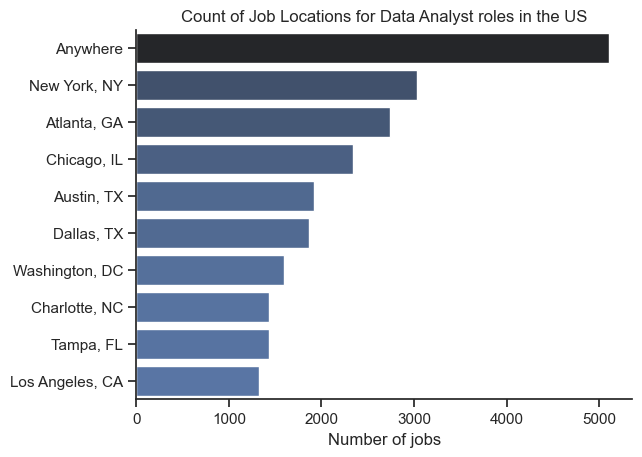

In [65]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location', hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Count of Job Locations for Data Analyst roles in the US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

finding the percentages of Data Analyst jobs:- work from home; - Degree required; -Health Insurance Offered

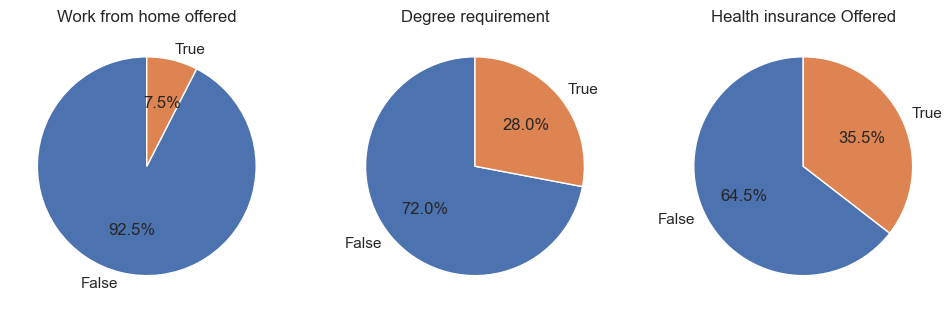

In [73]:
dict_column = {
    'job_work_from_home':'Work from home offered',
    'job_no_degree_mention':'Degree requirement',
    'job_health_insurance':'Health insurance Offered'
}
# Create a figure with 1 row, 3 columns of subplots
fig, ax = plt.subplots(1,3)

# Adjust figure size
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_US[column].value_counts()  # Get True/False counts
    ax[i].pie(counts, labels=counts.index.astype(str), autopct = '%1.1f%%',startangle=90)
    ax[i].set_title(title)


plt.show()




Different Counts of Company names

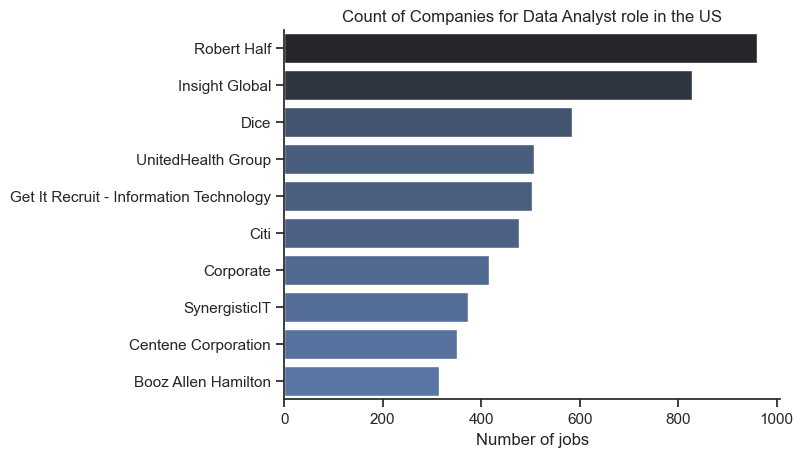

In [78]:
df1_plot=df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df1_plot,x='count',y='company_name', hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Count of Companies for Data Analyst role in the US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

In [3]:
df['job_country']

0         United States
1                Mexico
2               Germany
3         United States
4                 Sudan
              ...      
785736        Singapore
785737          Germany
785738         Malaysia
785739            Sudan
785740            India
Name: job_country, Length: 785741, dtype: object